In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv("pneumonia_blood_test_data.csv")


In [6]:
features = ['Age', 'White_Blood_Cell_Count', 'CRP_Level', 'ESR_Level']

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


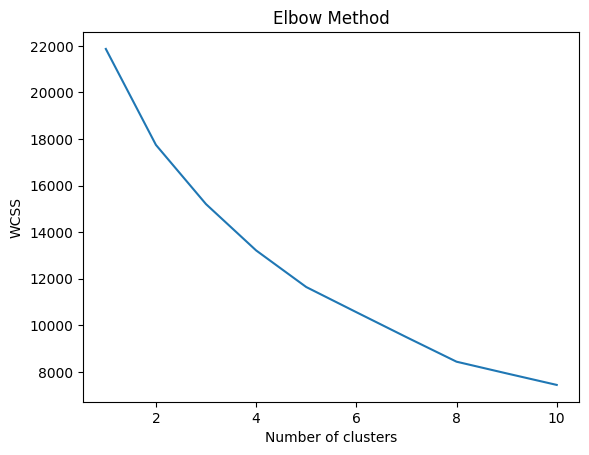

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
k = 3

In [12]:
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

In [13]:
data['Cluster'] = clusters

In [14]:
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers:
[[4.62635885e+01 1.03065319e+04 5.37670953e+00 2.41151373e+01]
 [4.39479683e+01 1.36602344e+04 1.05565461e+01 2.54915758e+01]
 [4.48555811e+01 1.01588705e+04 1.55405121e+01 2.48613349e+01]]


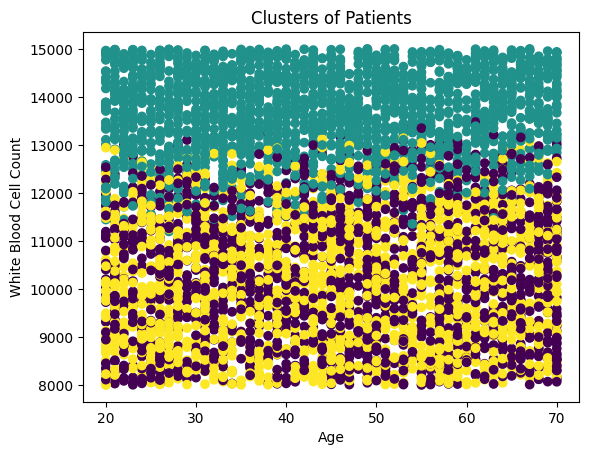

In [15]:
plt.scatter(data['Age'], data['White_Blood_Cell_Count'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('White Blood Cell Count')
plt.title('Clusters of Patients')
plt.show()

In [16]:
silhouette_avg = silhouette_score(data_scaled, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.17556589975926204
